# Example 3.1: The frequency response method 
This example will use the frequency response method to calculate the response due to an arbitrary load. We start by defining the equation of motion.

$$ \mathbf{M} \ddot{\mathbf{y}} + \mathbf{C} \dot{\mathbf{y}} + \mathbf{K} \mathbf{y} = \mathbf{X}(t) $$

Here $X(t)$ is the loading we assume is given by a Fourier series.

$$\mathbf{X}(t) = \sum_{-\infty}^{\infty}\mathbf{X}_ke^{i\omega_k t} $$

The Fourier coefficients are defined by

$$ \mathbf{X}_k = \int_{0}^{T}\mathbf{X}(t)e^{i\omega_k t}dt $$


Expressing the load as a Fourier series implies that it is periodic and thus repeats itself repeatedly. It is, therefore, only the steady-state response that is of interest. We solve the particular solution of the differential equation by solving for one frequency component at a time, assuming the solution.

$$\mathbf{u}(t) = \mathbf{G}(\omega_k) e^{i\omega_k t} $$

We insert this in the differential equation and solve for $\mathbf{G}(\omega_k)$. 

$$\mathbf{G}(\omega_k) = \left[-\omega_k^2 \mathbf{M} + i\omega_k \mathbf{C} + \mathbf{K}  \right]^{-1} \mathbf{X}_k =\mathbf{H}(\omega_k)\mathbf{X}_k $$

The total response of the system can be obtained by taking the sum of all the harmonic components in the Fourier series.

$$\mathbf{u}(t) = \sum_{-\infty}^{\infty}\mathbf{H}(\omega_k) \mathbf{X}_k e^{i\omega_k t} $$

In the equations above, it is assumed that a continuous function for the response i is available, while it is in practice only known at discrete points with separation $\Delta t$. This means that we will only resolve frequency components up to $1/(2\Delta t)$ Hz without aliasing. We can also rewrite the equation for the response slightly by utilising that the Fourier amplitudes for frequencies corresponding to $k>(N-1)/2$ are equal to $k<-(N-1)/2$. This is because the Fourier coefficients are also periodic.  We will also consider the length of the entire time series as the period of the loading. This means that the available load time history is assumed as the period of the loading. We can then rewrite the expression for the Fourier coefficients as

$$ \mathbf{X}_k = \frac{1}{N}\sum_{r=0}^{N-1}\mathbf{X}_r e^{-i\left(\frac{2\pi k r}{N} \right)} $$

We will now use this methodology to solve the dynamic response of a system subjected to impulsive loading. A sudden loading is not periodic, but we will add zeroes to the force-time history, and by assuming that the load is zero for a sufficiently long time after the response, we will see that the solution approaches the exact solution of the dynamic response

## Step1: Define the load

We start by defining the load as a linear ramp that suddenly drops to zero. We add a long period of zeros after the impulsive loading to ensure that the response is damped out at the end of the considered time interval.

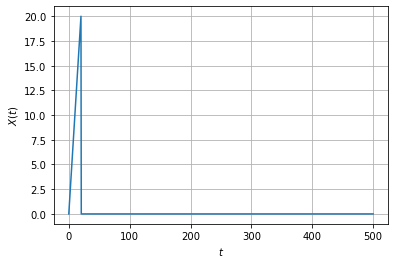

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0,500,1001) # Time vector, remember to use an odd number of points
X = np.linspace(0,500,1001) # Linear load
X[t>20] = 0.0               # The load is zero when t>20
# Plot the load
plt.figure()
plt.plot(t,X)
plt.ylabel(r'$X(t)$')
plt.xlabel(r'$t$')
plt.grid()


## Step2: Obtain the Fourier coefficients of the load
We use the fft algorithm to obtain the Fourier coefficients

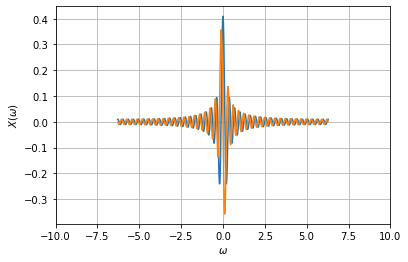

In [2]:
X_fft = np.fft.fft(X)/X.shape[0] # Fourier coefficients by fft (Devide by N since it is not included in NumPy)
X_fft = np.fft.fftshift(X_fft) # Shift the amplitudes such that negative frequencies comes first, then mean, then positive
Npoints = t.shape[0] # Npoints in the time series 
fs = 1.0/(t[1]-t[0]) # Sampling frequency
f = np.linspace(-fs/2,fs/2,Npoints) # Frequency axis. From negative to positive Nyquist frequency
w = 2*np.pi*f # Frequency in rad/s
# Plot Fourier amplitudes.
plt.figure()
plt.plot(w,np.real(X_fft))
plt.plot(w,np.imag(X_fft))
plt.xlim(-10,10)
plt.ylabel(r'$X(\omega)$')
plt.xlabel(r'$\omega$')
plt.grid()



## Step 3: Obtain the frequency response function
We calculate the frequency-response of the system

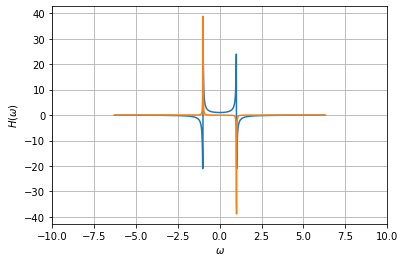

In [3]:
M = 1.0 # Mass
K = 1.0 # Stiffness
zeta = 1.0/100 #Damping ratio
C = 2*zeta*M*(K/M)**0.5 # Damping
H = 1.0/(-w**2*M +1j*w*C + K) # Frequency response

plt.figure()
plt.plot(w,np.real(H))
plt.plot(w,np.imag(H))
plt.ylabel(r'$H(\omega)$')
plt.xlabel(r'$\omega$')
plt.xlim(-10,10)
plt.grid()

## Step 4: Obtain the Fourier amplitudes of the response
The Fourier amplitudes of the response can be obtained by multiplying the frequency response and the Fourier amplitudes of the load.

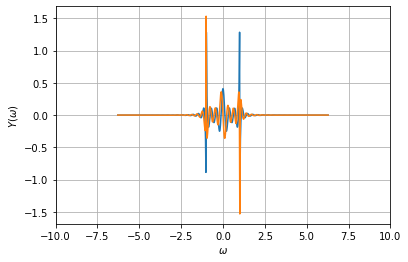

In [4]:
Y = H*X_fft # Fourier amplitudes of the response
# Plot Fourier amplitudes
plt.figure()
plt.plot(w,np.real(Y))
plt.plot(w,np.imag(Y))
plt.ylabel(r'$Y(\omega)$')
plt.xlabel(r'$\omega$')
plt.xlim(-10,10)
plt.grid()

# Step 5: Obtain the response by inverse Fourier transform
We solve the response by the ifft algorithm

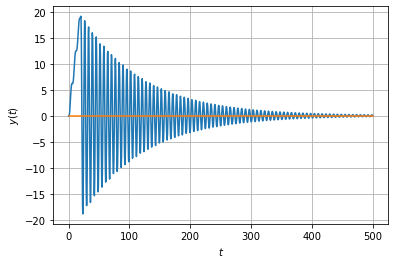

In [5]:
Ys = np.fft.ifftshift(Y)*t.shape[0] # We need to shift the amplitudes to match the definition in NumPy.
y = np.fft.ifft(Ys) # The response by ifft.
# Plor the response
plt.figure()
plt.plot(t,np.real(y),label = 'Re')
plt.plot(t,np.imag(y), label = 'Im')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()

The figure above shows the response for one period of the load. It is possible to calculate the response for several periods to investigate the model's pattern.

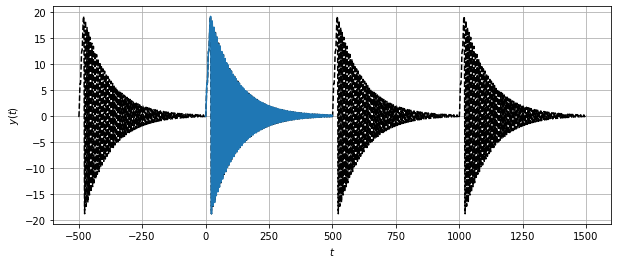

In [6]:
tp = np.hstack([t-t[-1], t, t+t[-1], t+2*t[-1]])
yp = np.zeros(tp.shape[0])
for k in range(f.shape[0]):
    yp = yp + Y[k]*np.exp(1j*w[k]*tp)
    
plt.figure(figsize=(10,4))
plt.plot(tp,np.real(yp),'--k',label = '3 Periods')
plt.plot(t,np.real(y),label = 'Re')
#plt.plot(tp,np.imag(yp), label = 'Im')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()


As expected, the response time series repeats itself as a direct consequence of that the period of the Fourier approximation is taken equal to the length of the available time history.  Try to change the loading duration to investigate what happens if the response has not decayed to zero at the end of the interval.